<img src="banco1.jpg" alt="banco1">

<h1 style = 'color:#14668a; text-align: center'>Universidad Castro Carazo</h1>
<h3 style = 'color:#14668a; text-align: center'>Curso: Machine Learning</h3>
<h3 style = 'color:#159a93; text-align: center'>Estudiante: Mariana Solis Roldan</h3>
<h2 style = 'color:#7de0b9; text-align: center'>Proyecto Final</h2>

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#estimators
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn import linear_model
#model metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

<h2 style="color: #f99200">Seleccionando y dividendo la Data</h2>

In [3]:
rawData = pd.read_excel("credit.xlsx")
rawData.head(3)

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month(Y),PAY 6,BILL AMTS,BILL AMT6,PAY AMT4,PAY AMTS,PAY AMT6
0,0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,default,-2,0,0,0,0,0
1,1,120000,female,university,2,26,-1,2,0,0,...,1000,0,2000,default,2,3455,3261,1000,0,2000
2,2,90000,female,university,2,34,0,0,0,0,...,1000,1000,5000,not default,0,14948,15549,1000,1000,5000


In [4]:
rawData.drop(['Unnamed: 0'],axis=1,inplace=True)
rawData.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month(Y),PAY 6,BILL AMTS,BILL AMT6,PAY AMT4,PAY AMTS,PAY AMT6
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,default,-2,0,0,0,0,0
1,120000,female,university,2,26,-1,2,0,0,0,...,1000,0,2000,default,2,3455,3261,1000,0,2000
2,90000,female,university,2,34,0,0,0,0,0,...,1000,1000,5000,not default,0,14948,15549,1000,1000,5000
3,50000,female,university,1,37,0,0,0,0,0,...,1100,1069,1000,not default,0,28959,29547,1100,1069,1000
4,50000,male,university,1,57,-1,0,-1,0,0,...,9000,689,679,not default,0,19146,19131,9000,689,679


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   LIMIT_BAL                      2396 non-null   int64 
 1   SEX                            2396 non-null   object
 2   EDUCATION                      2396 non-null   object
 3   MARRIAGE                       2396 non-null   int64 
 4   AGE                            2396 non-null   int64 
 5   PAY_0                          2396 non-null   int64 
 6   PAY_2                          2396 non-null   int64 
 7   PAY_3                          2396 non-null   int64 
 8   PAY_4                          2396 non-null   int64 
 9   PAY_5                          2396 non-null   int64 
 10  PAY_6                          2396 non-null   int64 
 11  BILL_AMT1                      2396 non-null   int64 
 12  BILL_AMT2                      2396 non-null   int64 
 13  BIL

In [39]:
selected_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 
                    'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
                    'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
                    'PAY_AMT5', 'PAY_AMT6'] 

X = rawData[selected_features]
print('Summary of feature sample')
print(X.head())

Summary of feature sample
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    0          3         1   24      2      2     -1     -1   
1     120000    0          3         2   26     -1      2      0      0   
2      90000    0          3         2   34      0      0      0      0   
3      50000    0          3         1   37      0      0      0      0   
4      50000    1          3         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...        689          0          0          0         0       689   
1      0  ...       2682       3272       3455       3261         0      1000   
2      0  ...      13559      14331      14948      15549      1518      1500   
3      0  ...      49291      28314      28959      29547      2000      2019   
4      0  ...      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY

In [7]:
y = rawData['default payment next month(Y)']  

<h3 style = 'color:#159a93'>Parámetros de ajuste y definición del modelo</h3>

In [8]:
model = LinearRegression(n_jobs=10)

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
rawData['default payment next month(Y)'] = label_encoder.fit_transform(rawData['default payment next month(Y)'])
rawData['EDUCATION'] = label_encoder.fit_transform(rawData['EDUCATION'])
rawData['SEX'] = label_encoder.fit_transform(rawData['SEX'])

# Definir las características y la variable dependiente
X = rawData.drop('default payment next month(Y)', axis=1)
y = rawData['default payment next month(Y)']

# Inicializar el modelo de regresión lineal
model = LinearRegression(n_jobs=10)

<h2 style="color: #f99200">Construyendo los modelos y eligiendo el modelo correcto</h2>

<h4 style = 'color:#14668a'>Validación cruzada y elección del modelo correcto</h4>

In [10]:
print(y)

0       0
1       0
2       1
3       1
4       1
       ..
2391    0
2392    1
2393    1
2394    1
2395    1
Name: default payment next month(Y), Length: 2396, dtype: int32


In [11]:
print(cross_val_score(model, X, y, cv=3))

[0.06500354 0.05878229 0.08776774]


<h4 style = 'color:#14668a'>Formato de modelado</h4>

In [12]:
modelos = []
modelos.append(('Random Forest Regressor', RandomForestRegressor()))
modelos.append(('Linear Regression', LinearRegression()))
modelos.append(('Support Vector Regression', SVR()))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
results = []
names = []
for name, model in modelos:
    result = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [15]:
for i in range(len(names)):
     print(f"{names[i]} R-squared: {results[i].mean():.4f} (+/- {results[i].std():.4f})")

Random Forest Regressor R-squared: 0.0919 (+/- 0.0157)
Linear Regression R-squared: 0.0721 (+/- 0.0298)
Support Vector Regression R-squared: -0.0789 (+/- 0.0196)


In [16]:
selected_model = LinearRegression()
model = selected_model.fit(X_train, y_train)

<h2 style="color: #f99200">Hacer predicciones y evaluar los resultados</h2>

<h4 style = 'color:#14668a'>Haciendo predicciones</h4>

In [17]:
predictions=model.predict(X_test)

<h4 style = 'color:#14668a'>Evaluación de los resultados</h4>

In [18]:
from math import sqrt

In [19]:
rmse=sqrt(mean_squared_error(y_test, predictions))
predRsquared=r2_score(y_test,predictions)

In [20]:
predictions = model.predict (X_test)
predRsquared = r2_score (y_test, predictions)
rmse =sqrt (mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared) 
print('RMSE: %.3f' % rmse)

R Squared: 0.065
RMSE: 0.398


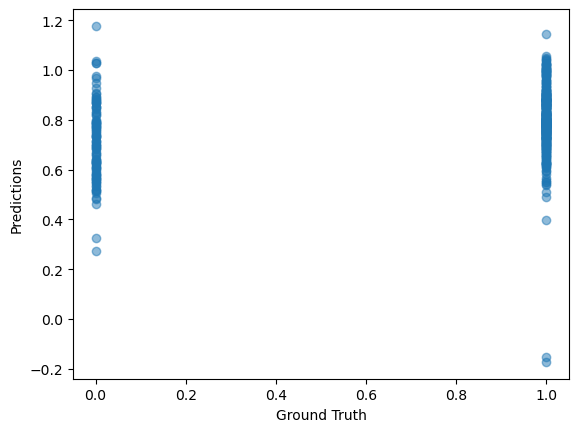

In [21]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()